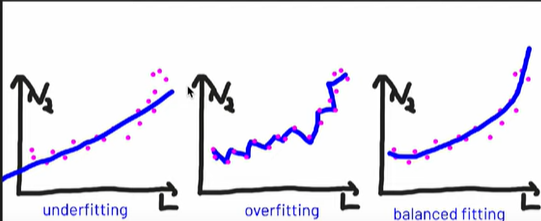

underfitting --> eksik öğrenme

overfitting --> aşırı öğrenme, ezberleme

balanced fitting --> dengeli öğrenme

In [ ]:
import seaborn as sns 
# veri virzualition görsellleştirme

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
df=sns.load_dataset("diamonds")
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [11]:
df=pd.get_dummies(df,columns=["cut","color","clarity"],drop_first=True)
for i in range(len(df.columns)):
    if i + 7 < len(df.columns):  # prevent index out of range
        df[df.columns[i + 7]] = df[df.columns[i + 7]].astype(int)
    if i == 16:
        break
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Premium    53940 non-null  int32  
 8   cut_Very Good  53940 non-null  int32  
 9   cut_Good       53940 non-null  int32  
 10  cut_Fair       53940 non-null  int32  
 11  color_E        53940 non-null  int32  
 12  color_F        53940 non-null  int32  
 13  color_G        53940 non-null  int32  
 14  color_H        53940 non-null  int32  
 15  color_I        53940 non-null  int32  
 16  color_J        53940 non-null  int32  
 17  clarity_VVS1   53940 non-null  int32  
 18  clarit

In [12]:
y=df[["price"]]
x=df.drop("price",axis=1)
df

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=19,train_size=0.7)

In [14]:
lm=LinearRegression()
model=lm.fit(x_train,y_train)

In [15]:
model.score(x_test,y_test)

0.9187471240784285

In [16]:
model.score(x_train,y_train)

0.9201584769136952

TEST VE TRAIN SCORELARI ARASINDAKİ FARK NE KADAR AZ İSE O KADAR BALANCED FITTING DİYEBİLİRİZ.